In [1]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from scipy import stats
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
filename  = './dataset/ifood_df.csv'
dataset_df = pd.read_csv(filename)
dataset_df.head(10)
print(dataset_df.dtypes)

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

In [5]:
def summarize(inputdf):
    cnt = inputdf.count() #計算項目數
    isNA = inputdf.isnull().sum() #計算有多少缺失值
    nmean = inputdf.mean() #計算項目平均值
    nmax = inputdf.max()
    nmin = inputdf.min()
    nmedian = inputdf.median() #中位數
    nQ1 = inputdf.quantile(0.25) #第一四分位數
    nQ3 = inputdf.quantile(0.75) #第三四分位數
    summarize_dic = {
        '項目數' : cnt,
        '缺失值' : isNA,
        '平均值' : nmean,
        '最小值' : nmin,
        '最大值' : nmax,
        '中位數' : nmedian,
        '第一四分位數' : nQ1,
        '第三四分位數' : nQ3
    }
    summarivze_df = pd.DataFrame.from_dict(summarize_dic, orient = 'index', columns = ['value'])

    return(summarivze_df)

    

In [4]:
print (f'{len(dataset_df.columns)} columns in dataset')
#dataset_df['Teenhome'].dtype in ['float64','int']

39 columns in dataset


In [6]:
for i in range((len(dataset_df.columns))):
    colname = dataset_df.columns[i]
    if dataset_df[colname].dtype in ['float64','int']:
        print("""
            欄位：{colnames}
            摘要：
              {summarizes}

            -----------------------------------分佈圖-----------------------------------
              
              """.format(colnames = colname, summarizes = summarize(dataset_df[colname])))
        #print(sns.displot(dataset_df[colname]))
    else :
        print("""
            欄位：{colnames}, {types}
              """.format(colnames = colname, types = dataset_df[colname].dtype))


            欄位：Income
            摘要：
                              value
項目數       2205.000000
缺失值          0.000000
平均值      51622.094785
最小值       1730.000000
最大值     113734.000000
中位數      51287.000000
第一四分位數   35196.000000
第三四分位數   68281.000000

            -----------------------------------分佈圖-----------------------------------
              
              

            欄位：Kidhome
            摘要：
                            value
項目數     2205.000000
缺失值        0.000000
平均值        0.442177
最小值        0.000000
最大值        2.000000
中位數        0.000000
第一四分位數     0.000000
第三四分位數     1.000000

            -----------------------------------分佈圖-----------------------------------
              
              

            欄位：Teenhome
            摘要：
                            value
項目數     2205.000000
缺失值        0.000000
平均值        0.506576
最小值        0.000000
最大值        2.000000
中位數        0.000000
第一四分位數     0.000000
第三四分位數     1.000000

            ---------------------------------

In [12]:
#remove z_revenue and Z_costcontact as all the values are zero
dataset_df = dataset_df.drop(columns=['Z_Revenue','Z_CostContact'])

In [7]:
def draw_histogram(inputdf, colname):
    sns.histplot(inputdf[colname], kde=True, bins=30)
    plt.title(f'Histogram of {colname}')
    plt.xlabel(colname)
    plt.ylabel('Frequency')
    plt.show()

Response Rate of All Promotions: 0.15


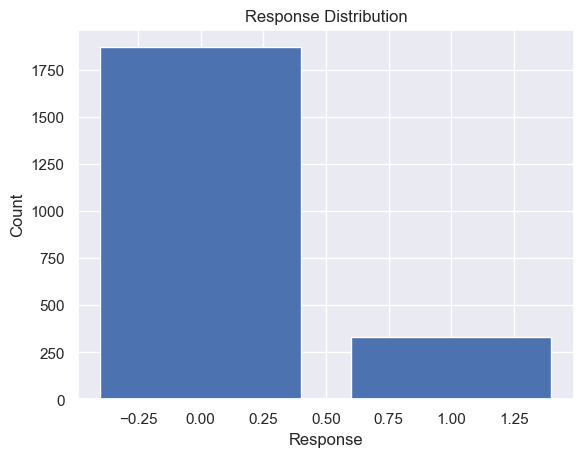

In [8]:
response_df = dataset_df['Response'].value_counts().reset_index()
response_rt = response_df[response_df['Response'] == 1]['count'] / response_df['count'].sum()
print("Response Rate of All Promotions: {:.2f}".format(response_rt.values[0]))
plt.bar(data=dataset_df['Response'].value_counts().reset_index(), x= 'Response',  height = 'count')
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Response Distribution')
plt.show()

In [9]:
dataset_df['Income'].describe()
ifnull_income = dataset_df['Income'].isnull().sum()
print("Number of null of Income: {}".format(ifnull_income))
print(dataset_df[dataset_df['Income'].isnull()])

Number of null of Income: 0
Empty DataFrame
Columns: [Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response, Age, Customer_Days, marital_Divorced, marital_Married, marital_Single, marital_Together, marital_Widow, education_2n Cycle, education_Basic, education_Graduation, education_Master, education_PhD, MntTotal, MntRegularProds, AcceptedCmpOverall]
Index: []

[0 rows x 39 columns]


count    2.205000e+03
mean     2.255691e-17
std      1.000227e+00
min     -2.409272e+00
25%     -7.932106e-01
50%     -1.618161e-02
75%      8.044529e-01
max      2.999363e+00
Name: Income_z, dtype: float64


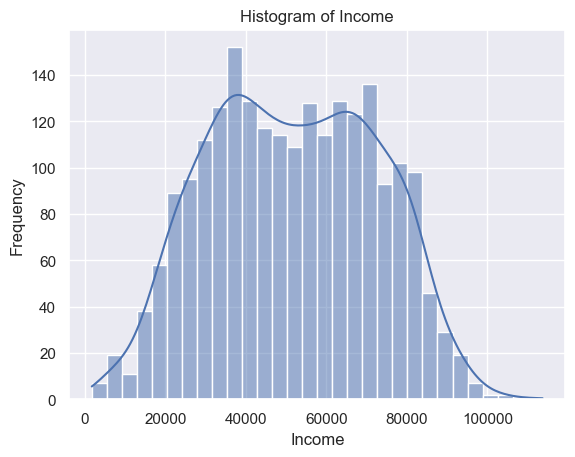

In [13]:
dataset_df['Income'].describe()
dataset_df['Income_z'] = stats.zscore(dataset_df['Income'])
print(dataset_df['Income_z'].describe())
draw_histogram(dataset_df, 'Income')


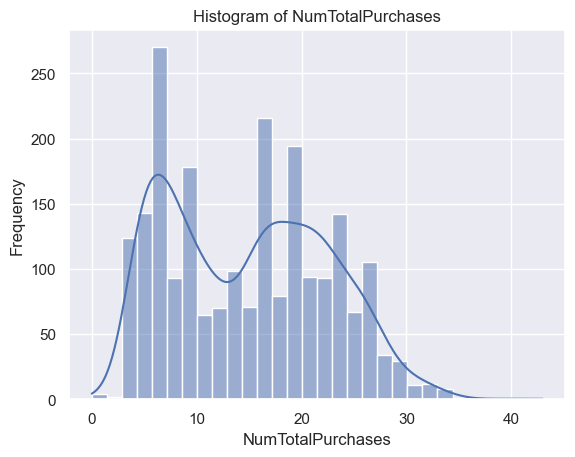

In [15]:
#calculate total times purchases
dataset_df['NumTotalPurchases'] = dataset_df['NumWebPurchases'] + dataset_df['NumCatalogPurchases'] + dataset_df['NumStorePurchases'] + dataset_df['NumDealsPurchases']
draw_histogram(dataset_df, 'NumTotalPurchases')


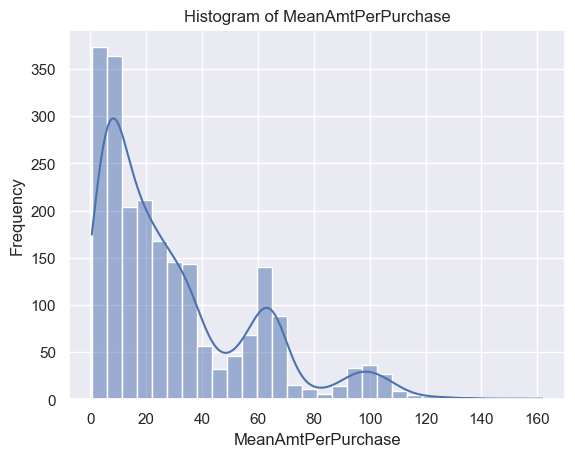

count    2205.000000
mean             inf
std              NaN
min         0.466667
25%         7.800000
50%        20.809524
75%        41.619048
max              inf
Name: MeanAmtPerPurchase, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [ ]:
#calculate mean amount per purchase
dataset_df['MeanAmtPerPurchase'] = dataset_df['MntTotal'] / dataset_df['NumTotalPurchases']
draw_histogram(dataset_df, 'MeanAmtPerPurchase')
print(dataset_df['MeanAmtPerPurchase'].describe())

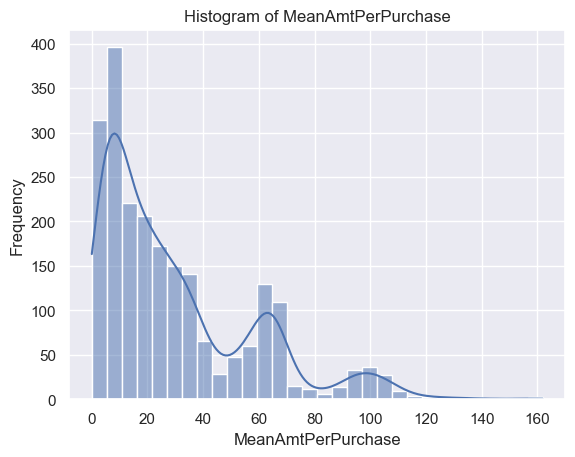

In [24]:
dataset_df['MeanAmtPerPurchase'] = dataset_df['MeanAmtPerPurchase'].replace([np.inf, -np.inf], 0)
dataset_df['MeanAmtPerPurchase'].describe()
draw_histogram(dataset_df, 'MeanAmtPerPurchase')

count    2205.000000
mean       29.868397
std        27.425570
min         0.000000
25%         7.800000
50%        20.769231
75%        41.357143
max       161.923077
Name: MeanAmtPerPurchase, dtype: float64


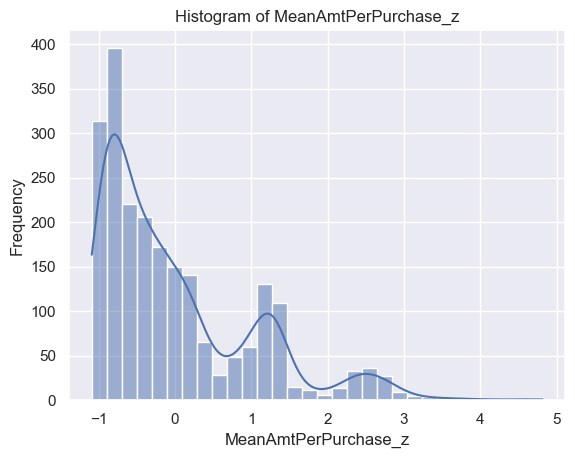

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6                2                 1             6  ...   
2                 127              111                21            42  ...   
3                  20               10                 3             5  ...   
4                 118               46                27            15  ...   
...               ...              ...               ...           ...  ...   
2200              182               42               118           247  ...   
2201               30                0                 0             8  ...   
2202              217               32                12            24  ...   
2203              214               80                30            61  ...   
2204               61                2                 1            21  ...   

      education_Basic  education_Graduation  education_Master  education_PhD  \
0                   0                     1                 0              0   
1                   0                     1                 0              0   
2                   0                     1                 0              0   
3                   0                     1                 0              0   
4                   0                     0                 0              1   
...               ...                   ...               ...            ...   
2200                0                     1                 0              0   
2201                0                     0                 0              1   
2202                0                     1                 0              0   
2203                0                     0                 1              0   
2204                0                     0                 0              1   

      MntTotal  MntRegularProds  AcceptedCmpOverall  Income_z  \
0         1529             1441                   0  0.314651   
1           21               15                   0 -0.254877   
2          734              692                   0  0.965354   
3           48               43                   0 -1.206087   
4          407              392                   0  0.322136   
...        ...              ...                 ...       ...   
2200      1094              847                   0  0.463624   
2201       436              428                   1  0.598401   
2202      1217             1193                   1  0.258780   
2203       782              721                   0  0.851004   
2204       151              130                   0  0.060213   

      NumTotalPurchases  MeanAmtPerPurchase  
0                    25           61.160000  
1                     6            3.500000  
2                    21           34.952381  
3                     8            6.000000  
4                    19           21.421053  
...                 ...                 ...  
2200                 18           60.777778  
2201                 22           19.818182  
2202                 19           64.052632  
2203                 23           34.000000  
2204             

In [ ]:
#standardize MeanAmtPerPurchase]
#dataset_df['MeanAmtPerPurchase_z'] = stats.zscore(dataset_df['MeanAmtPerPurchase'])
#print(dataset_df['MeanAmtPerPurchase'].describe())
#draw_histogram(dataset_df, 'MeanAmtPerPurchase_z')
#dataset_df.drop(columns = ['MeanAmtPerPurchase_z'])

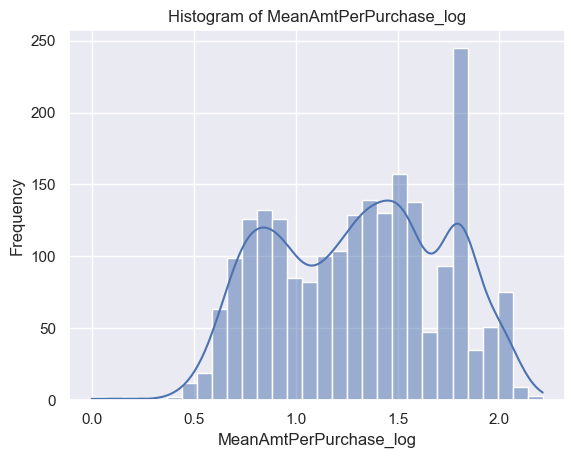

In [27]:
MeanAmtPerPurchase_log = np.log10(dataset_df['MeanAmtPerPurchase'] + 1)
#print(MeanAmtPerPurchase_log)
dataset_df['MeanAmtPerPurchase_log'] = MeanAmtPerPurchase_log
#print(dataset_df['MeanAmtPerPurchase_log'].head(100))
draw_histogram(dataset_df, 'MeanAmtPerPurchase_log')


In [30]:
dataset_df_columns = dataset_df.columns.to_list()
for i in dataset_df_columns:
    print (i)

Income
Kidhome
Teenhome
Recency
MntWines
MntFruits
MntMeatProducts
MntFishProducts
MntSweetProducts
MntGoldProds
NumDealsPurchases
NumWebPurchases
NumCatalogPurchases
NumStorePurchases
NumWebVisitsMonth
AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Complain
Z_CostContact
Z_Revenue
Response
Age
Customer_Days
marital_Divorced
marital_Married
marital_Single
marital_Together
marital_Widow
education_2n Cycle
education_Basic
education_Graduation
education_Master
education_PhD
MntTotal
MntRegularProds
AcceptedCmpOverall
Income_z
NumTotalPurchases
MeanAmtPerPurchase
MeanAmtPerPurchase_z
MeanAmtPerPurchase_log
MntWines_z
MntWines_log


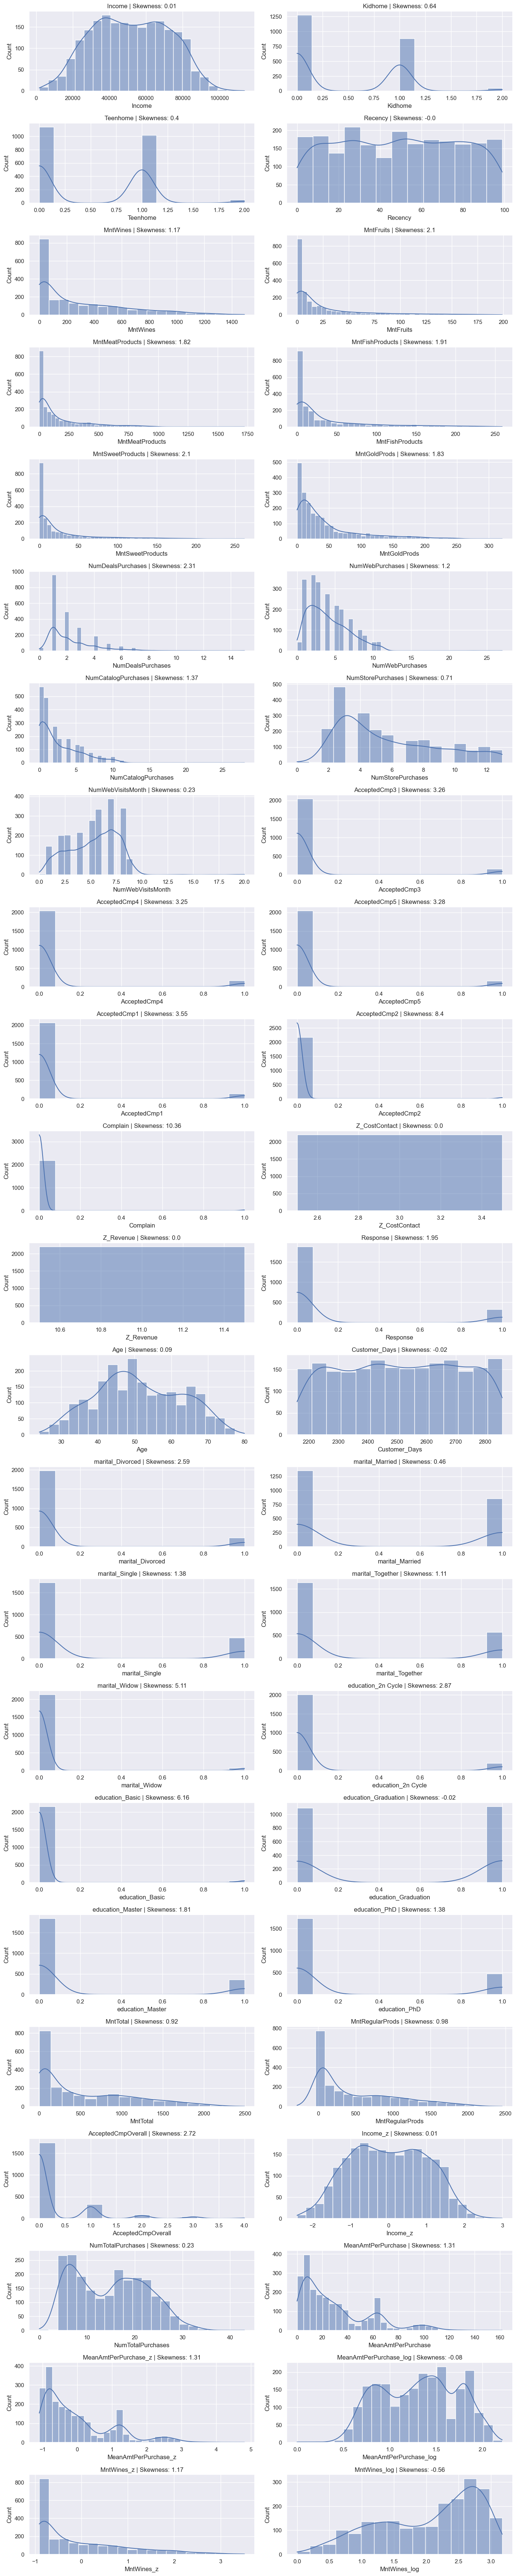

In [31]:
plt.figure(figsize=(14, len(dataset_df) * 3))
for idx, feature in enumerate(dataset_df, 1):
    plt.subplot(len(dataset_df), 2, idx)
    sns.histplot(dataset_df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(dataset_df[feature].skew(), 2)}") #observe skewness of each numerical feature

plt.tight_layout()
plt.show()

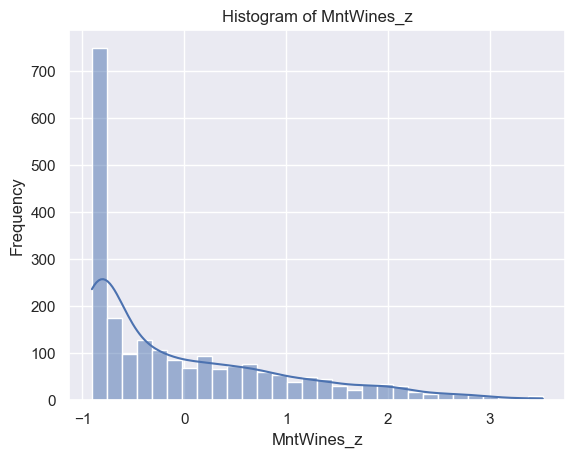

count    2.205000e+03
mean    -2.416812e-17
std      1.000227e+00
min     -9.073768e-01
25%     -8.362482e-01
50%     -3.798401e-01
75%      5.952136e-01
max      3.517411e+00
Name: MntWines_z, dtype: float64


In [28]:
dataset_df['MntWines_z'] = stats.zscore(dataset_df['MntWines'])
draw_histogram(dataset_df, 'MntWines_z')
print(dataset_df['MntWines_z'].describe())

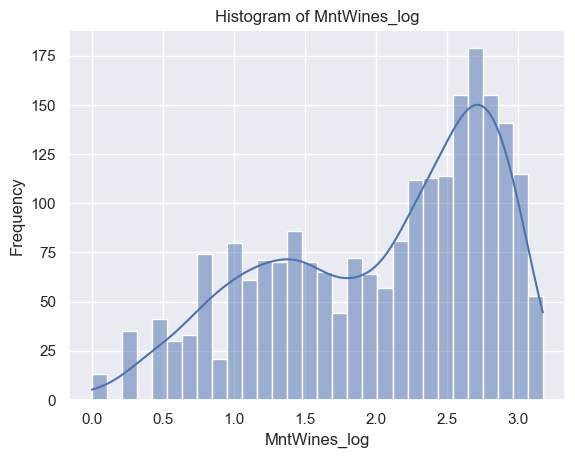

In [29]:
MntWines_log = np.log10(dataset_df['MntWines'] + 1)
#print(MeanAmtPerPurchase_log)
dataset_df['MntWines_log'] = MntWines_log
#print(dataset_df['MeanAmtPerPurchase_log'].head(100))
draw_histogram(dataset_df, 'MntWines_log')


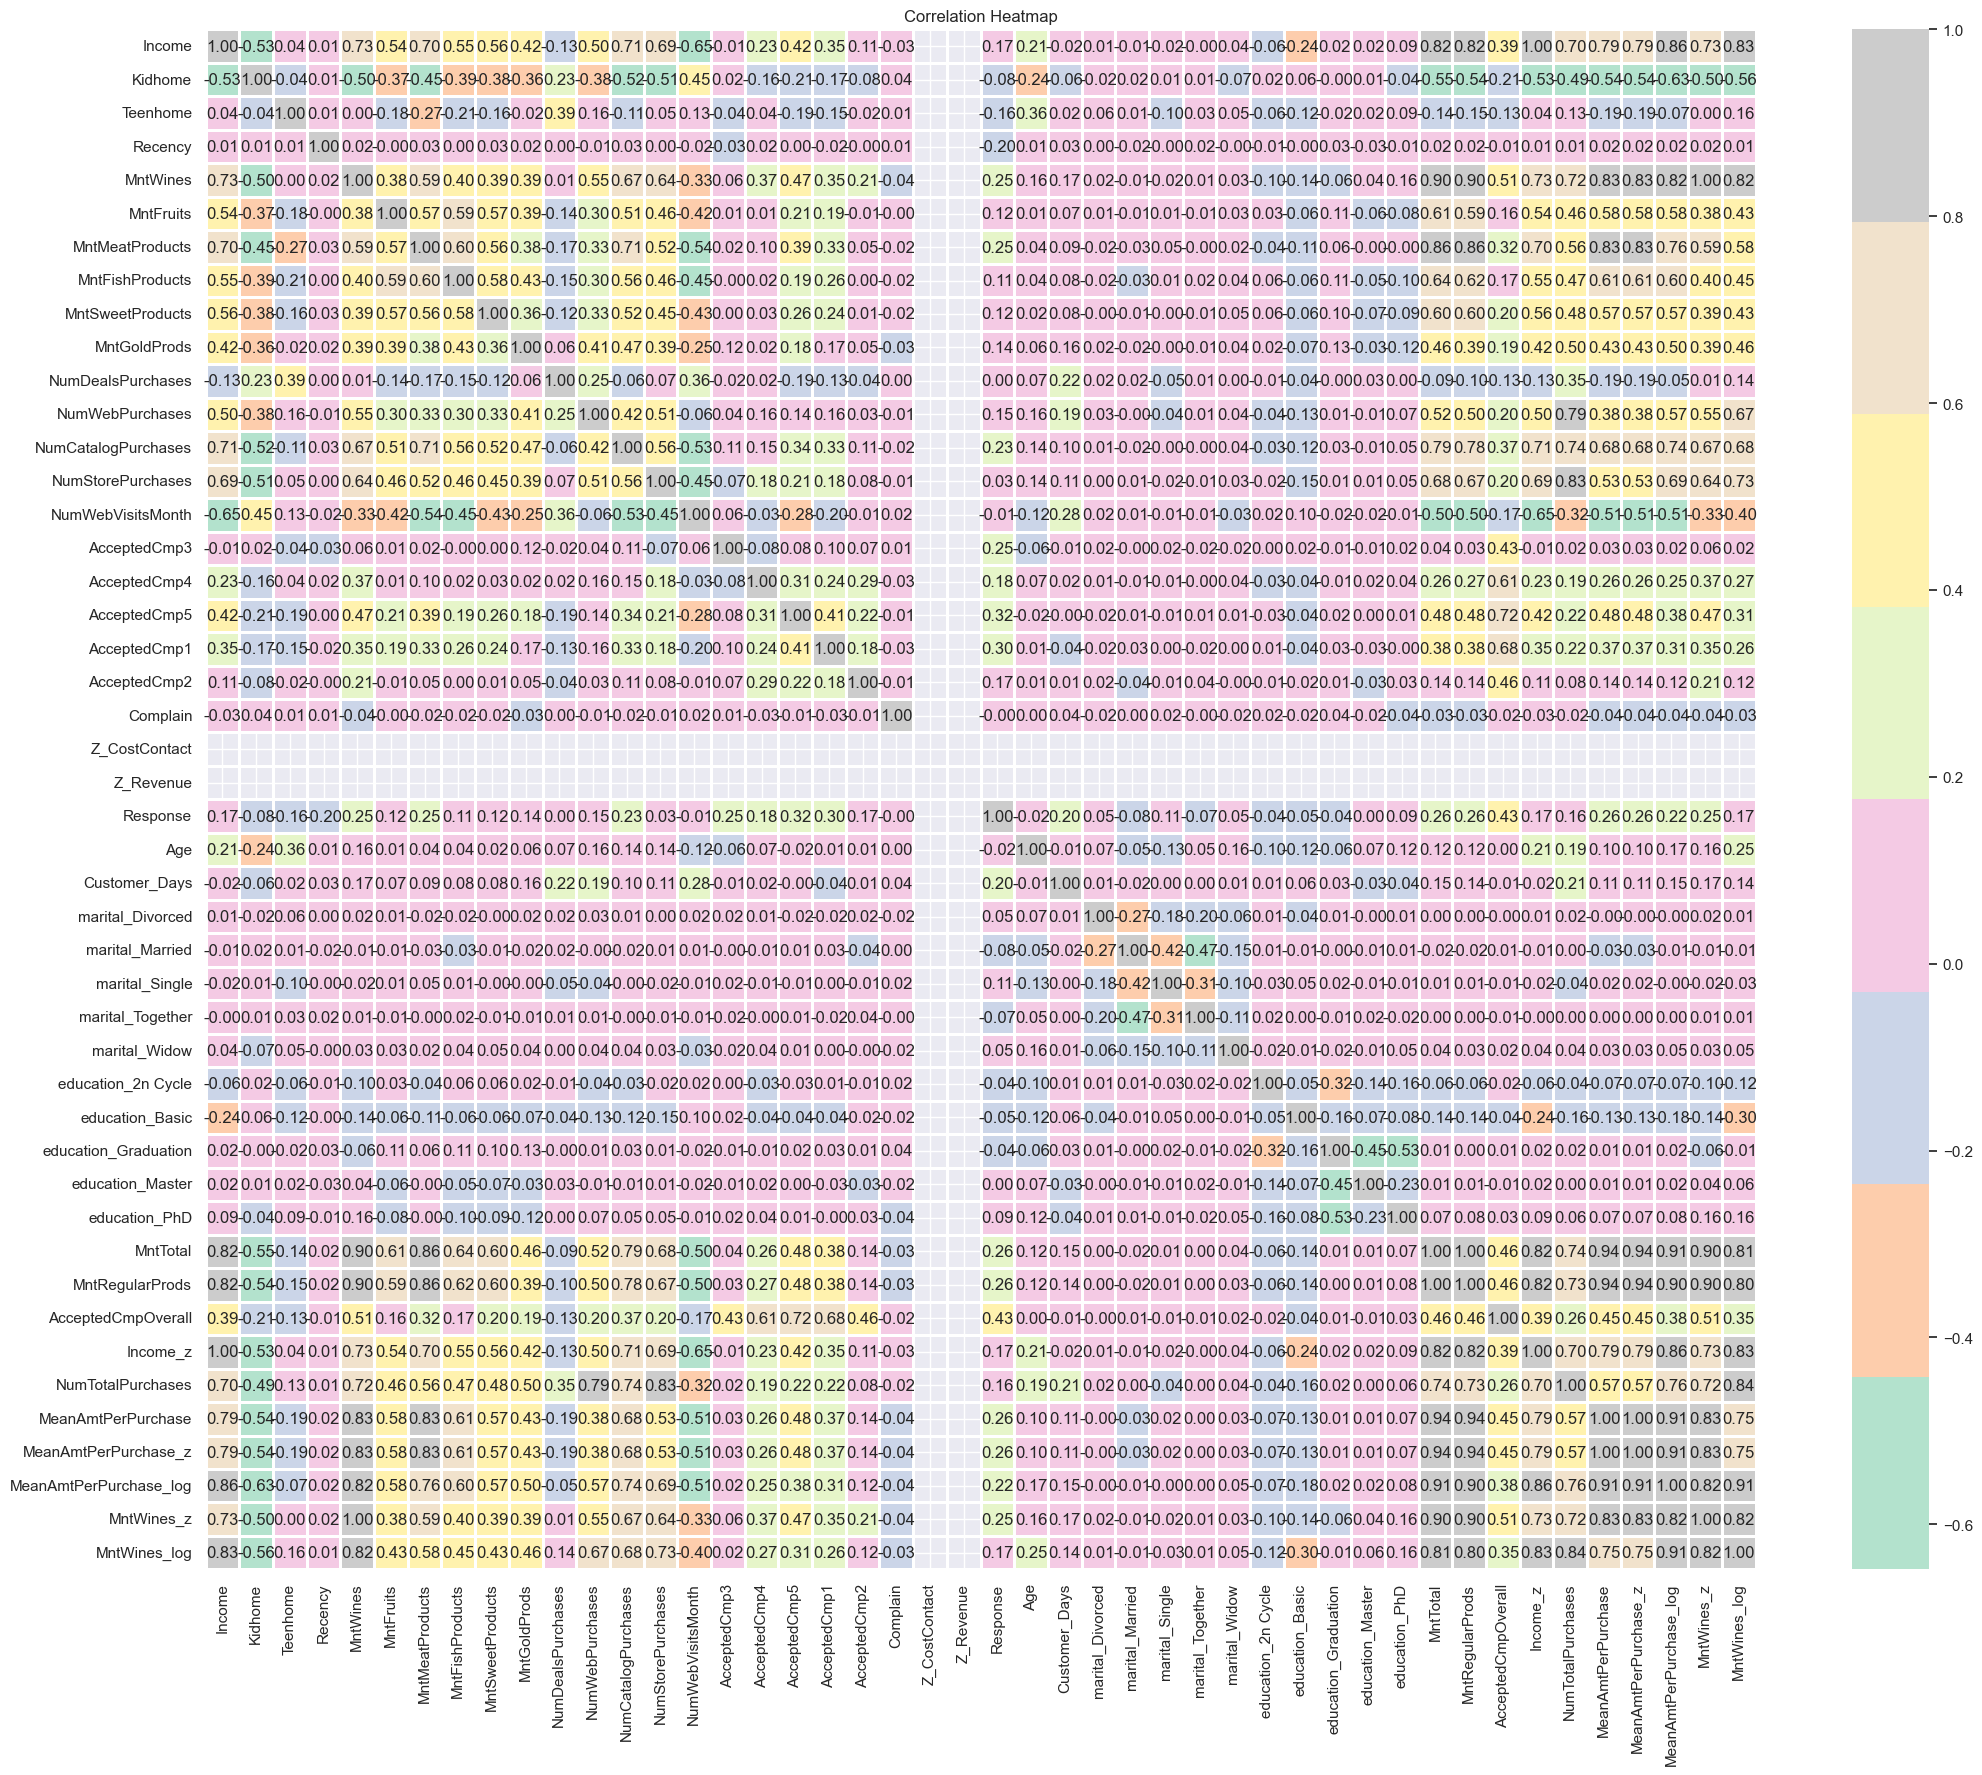

In [32]:
plt.figure(figsize=(25, 20))
sns.heatmap(dataset_df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

In [33]:
# get purchase perferences by calculating the ratio of each purchase type to total purchases
dataset_df['MntMeatProducts_ratio'] = dataset_df['MntMeatProducts'] / dataset_df['MntTotal']
dataset_df['MntFishProducts_ratio'] = dataset_df['MntFishProducts'] / dataset_df['MntTotal']
dataset_df['MntSweetProducts_ratio'] = dataset_df['MntSweetProducts'] / dataset_df['MntTotal']
dataset_df['MntFruits_ratio'] = dataset_df['MntFruits'] / dataset_df['MntTotal']
dataset_df['MntGoldProds_ratio'] = dataset_df['MntGoldProds'] / dataset_df['MntTotal']
dataset_df['MntWines_ratio'] = dataset_df['MntWines'] / dataset_df['MntTotal']
dataset_df['MntRegularProds_ratio'] = dataset_df['MntRegularProds'] / dataset_df['MntTotal']

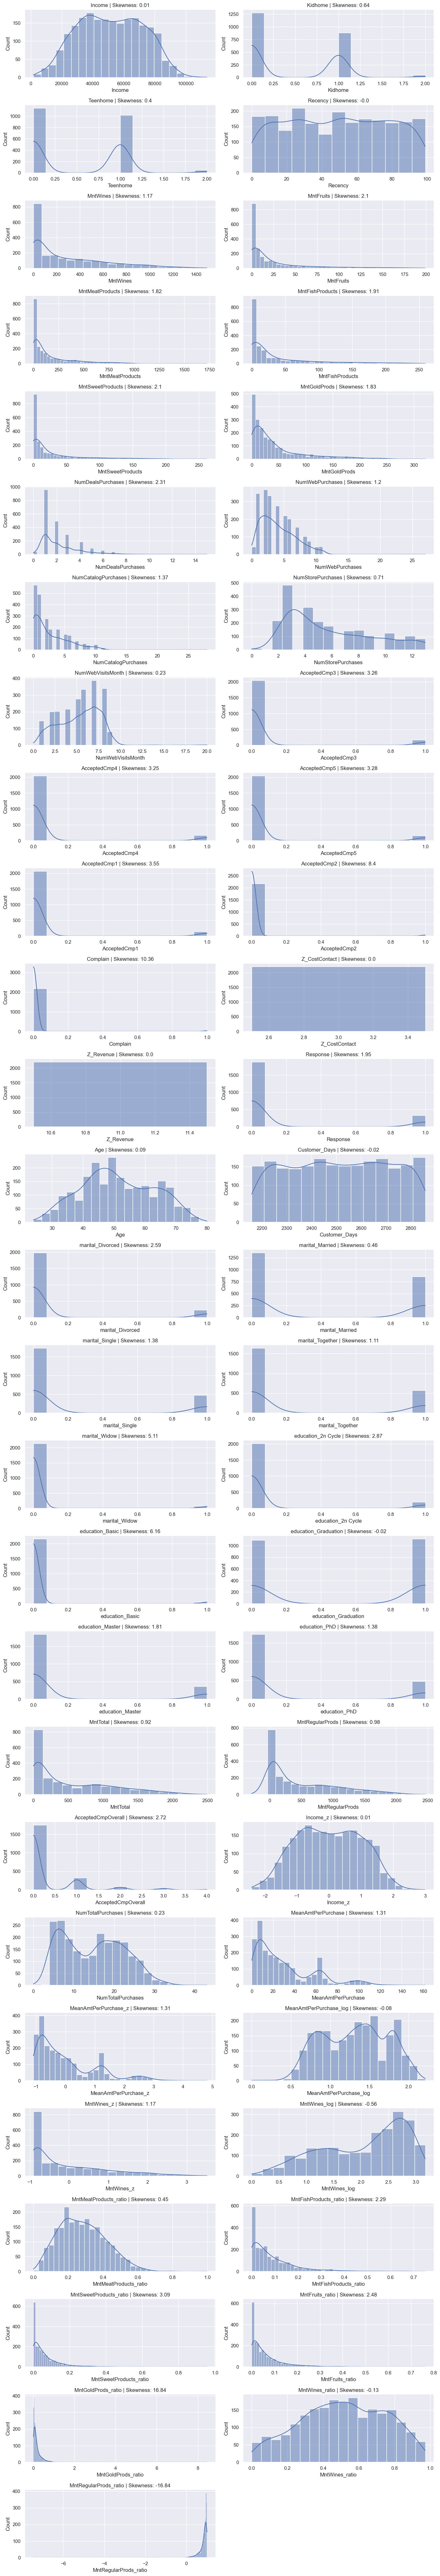

In [34]:
plt.figure(figsize=(14, len(dataset_df) * 3))
for idx, feature in enumerate(dataset_df, 1):
    plt.subplot(len(dataset_df), 2, idx)
    sns.histplot(dataset_df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(dataset_df[feature].skew(), 2)}") #observe skewness of each numerical feature

plt.tight_layout()
plt.show()

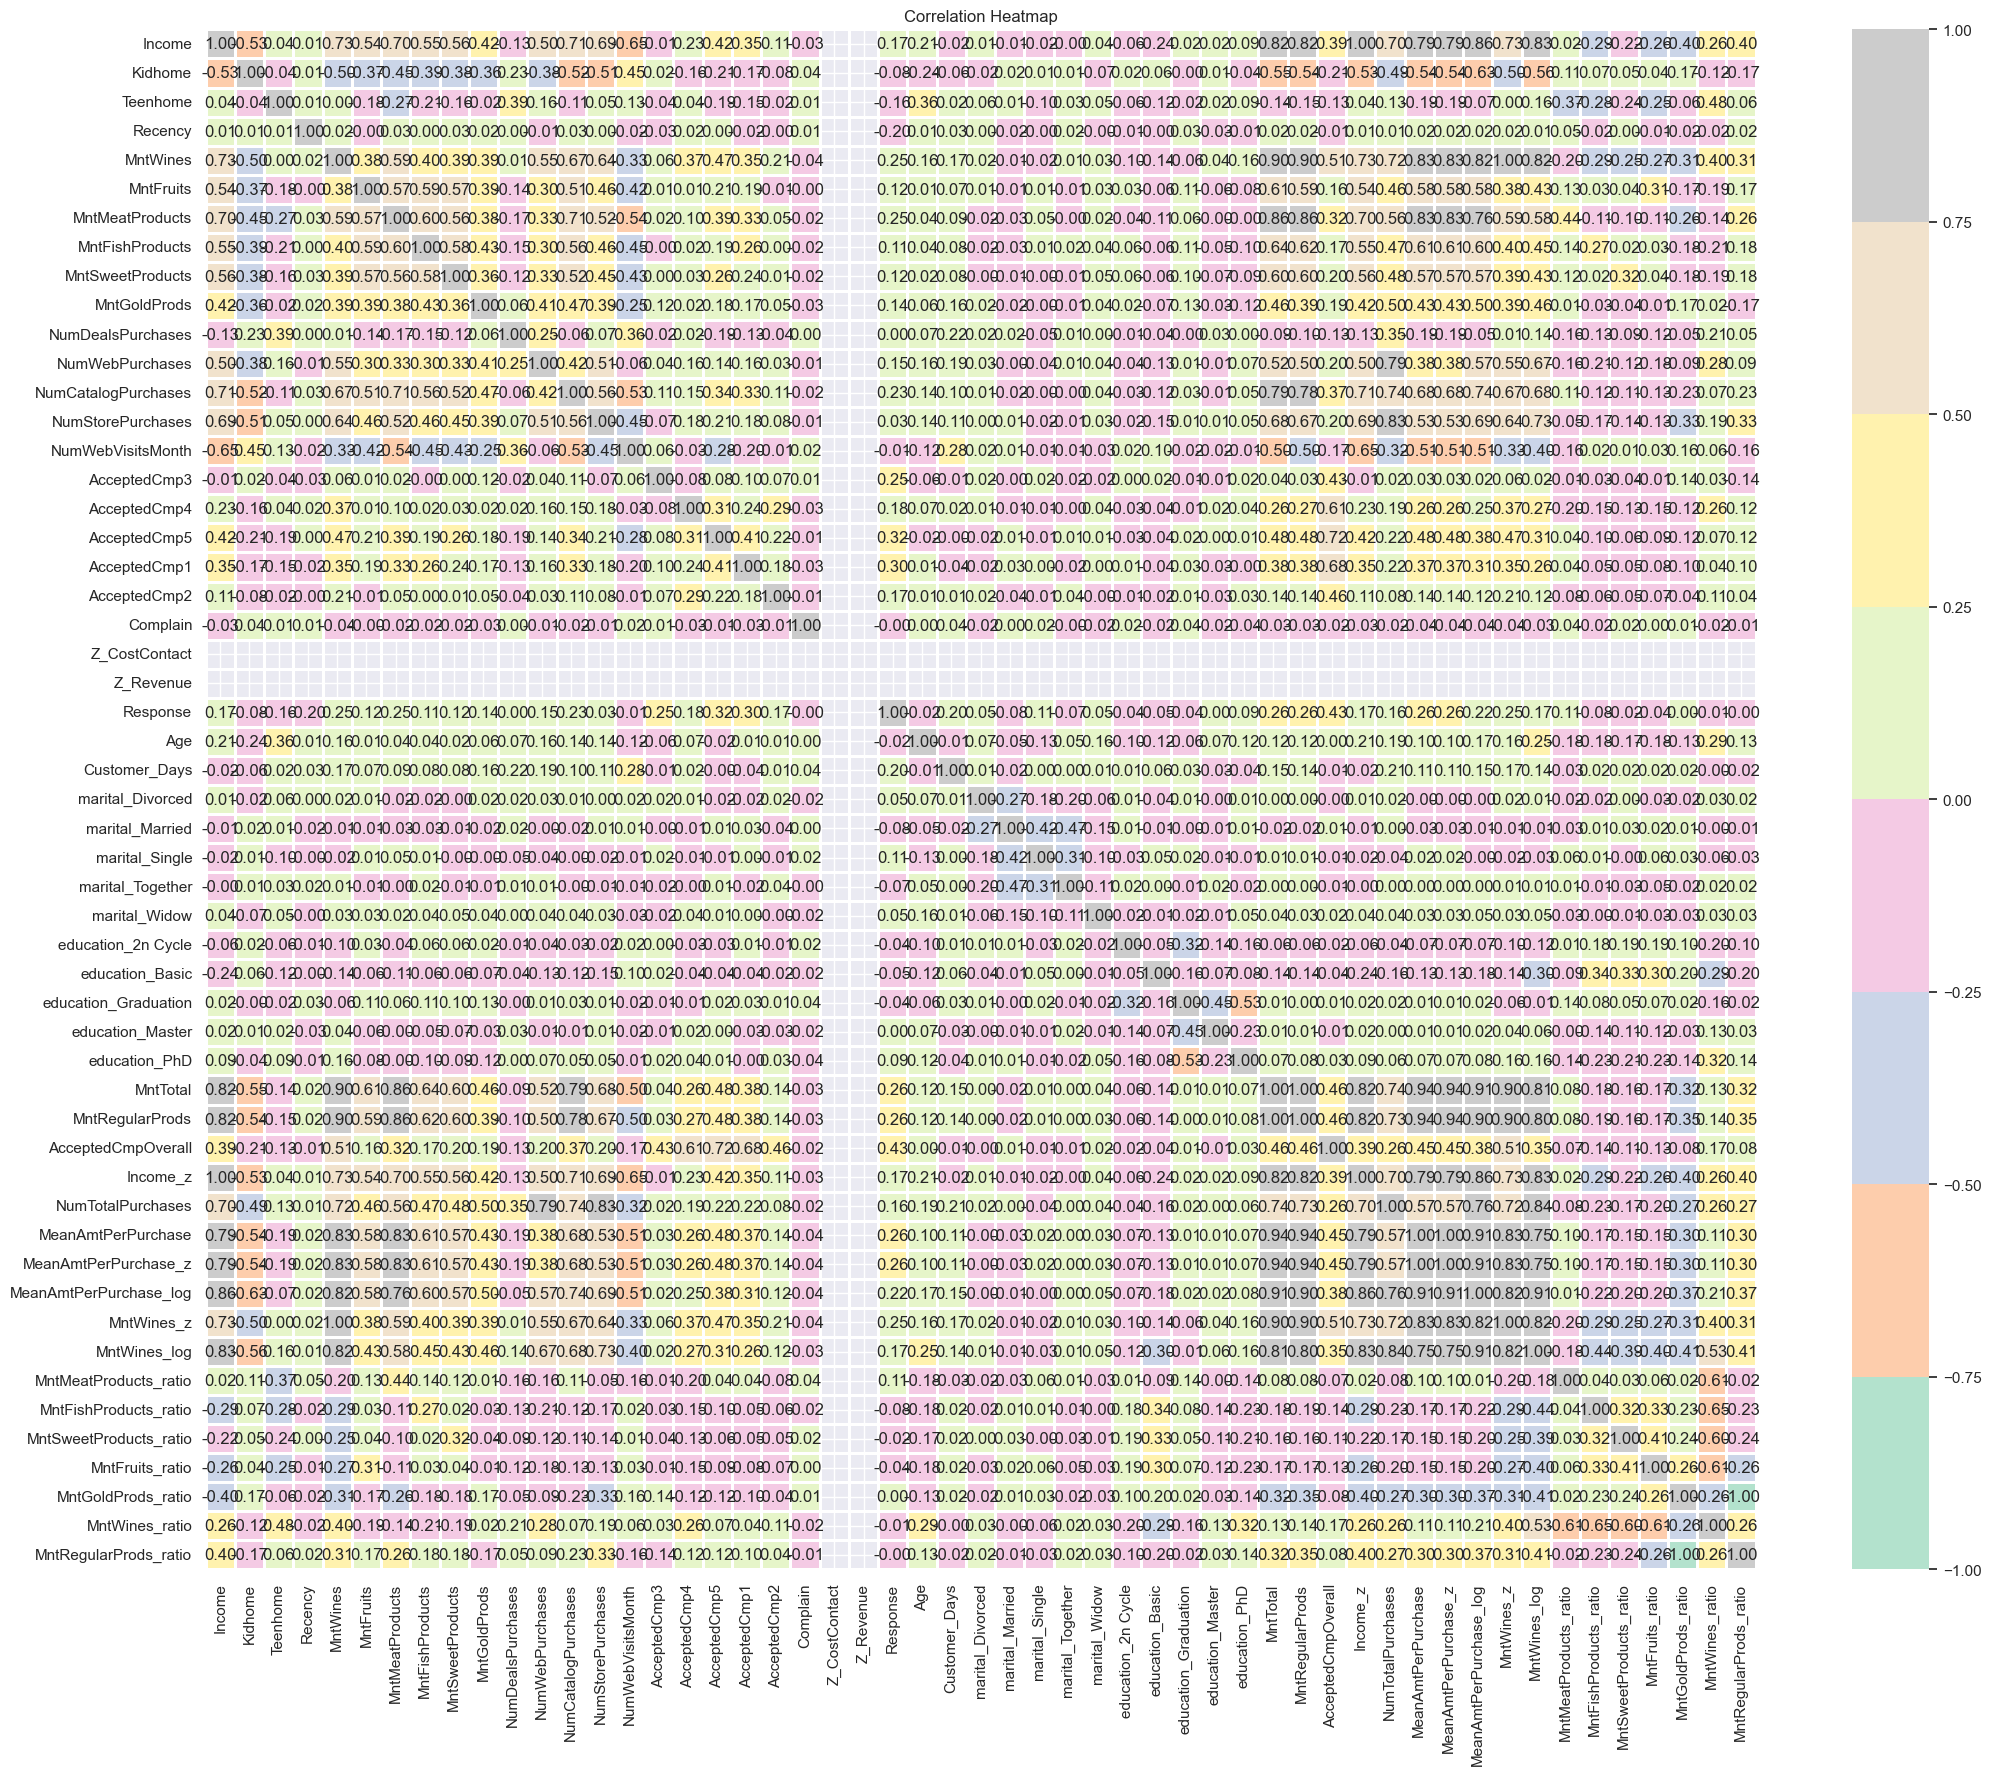

In [35]:
plt.figure(figsize=(25, 20))
sns.heatmap(dataset_df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

In [39]:
#remove original amount spent columns and Income, MeanAmtPerPurchase for correlation analysis
dataset_df_columns = dataset_df.columns.to_list()
dataset_df_columns_new = dataset_df_columns.copy()
dataset_df_columns_new.remove('MntMeatProducts')
dataset_df_columns_new.remove('MntFishProducts')
dataset_df_columns_new.remove('MntSweetProducts')
dataset_df_columns_new.remove('MntFruits')
dataset_df_columns_new.remove('MntGoldProds')
dataset_df_columns_new.remove('MntWines')
dataset_df_columns_new.remove('MntRegularProds')
dataset_df_columns_new.remove('MntTotal')
dataset_df_columns_new.remove('Income')
dataset_df_columns_new.remove('MeanAmtPerPurchase')
dataset_df_columns_new.remove('MntWines_log')
dataset_df_columns_new.remove('MntWines_z')
dataset_df_columns_new.remove('Z_Revenue')
dataset_df_columns_new.remove('Z_CostContact')
dataset_selected_columns = dataset_df[dataset_df_columns_new]

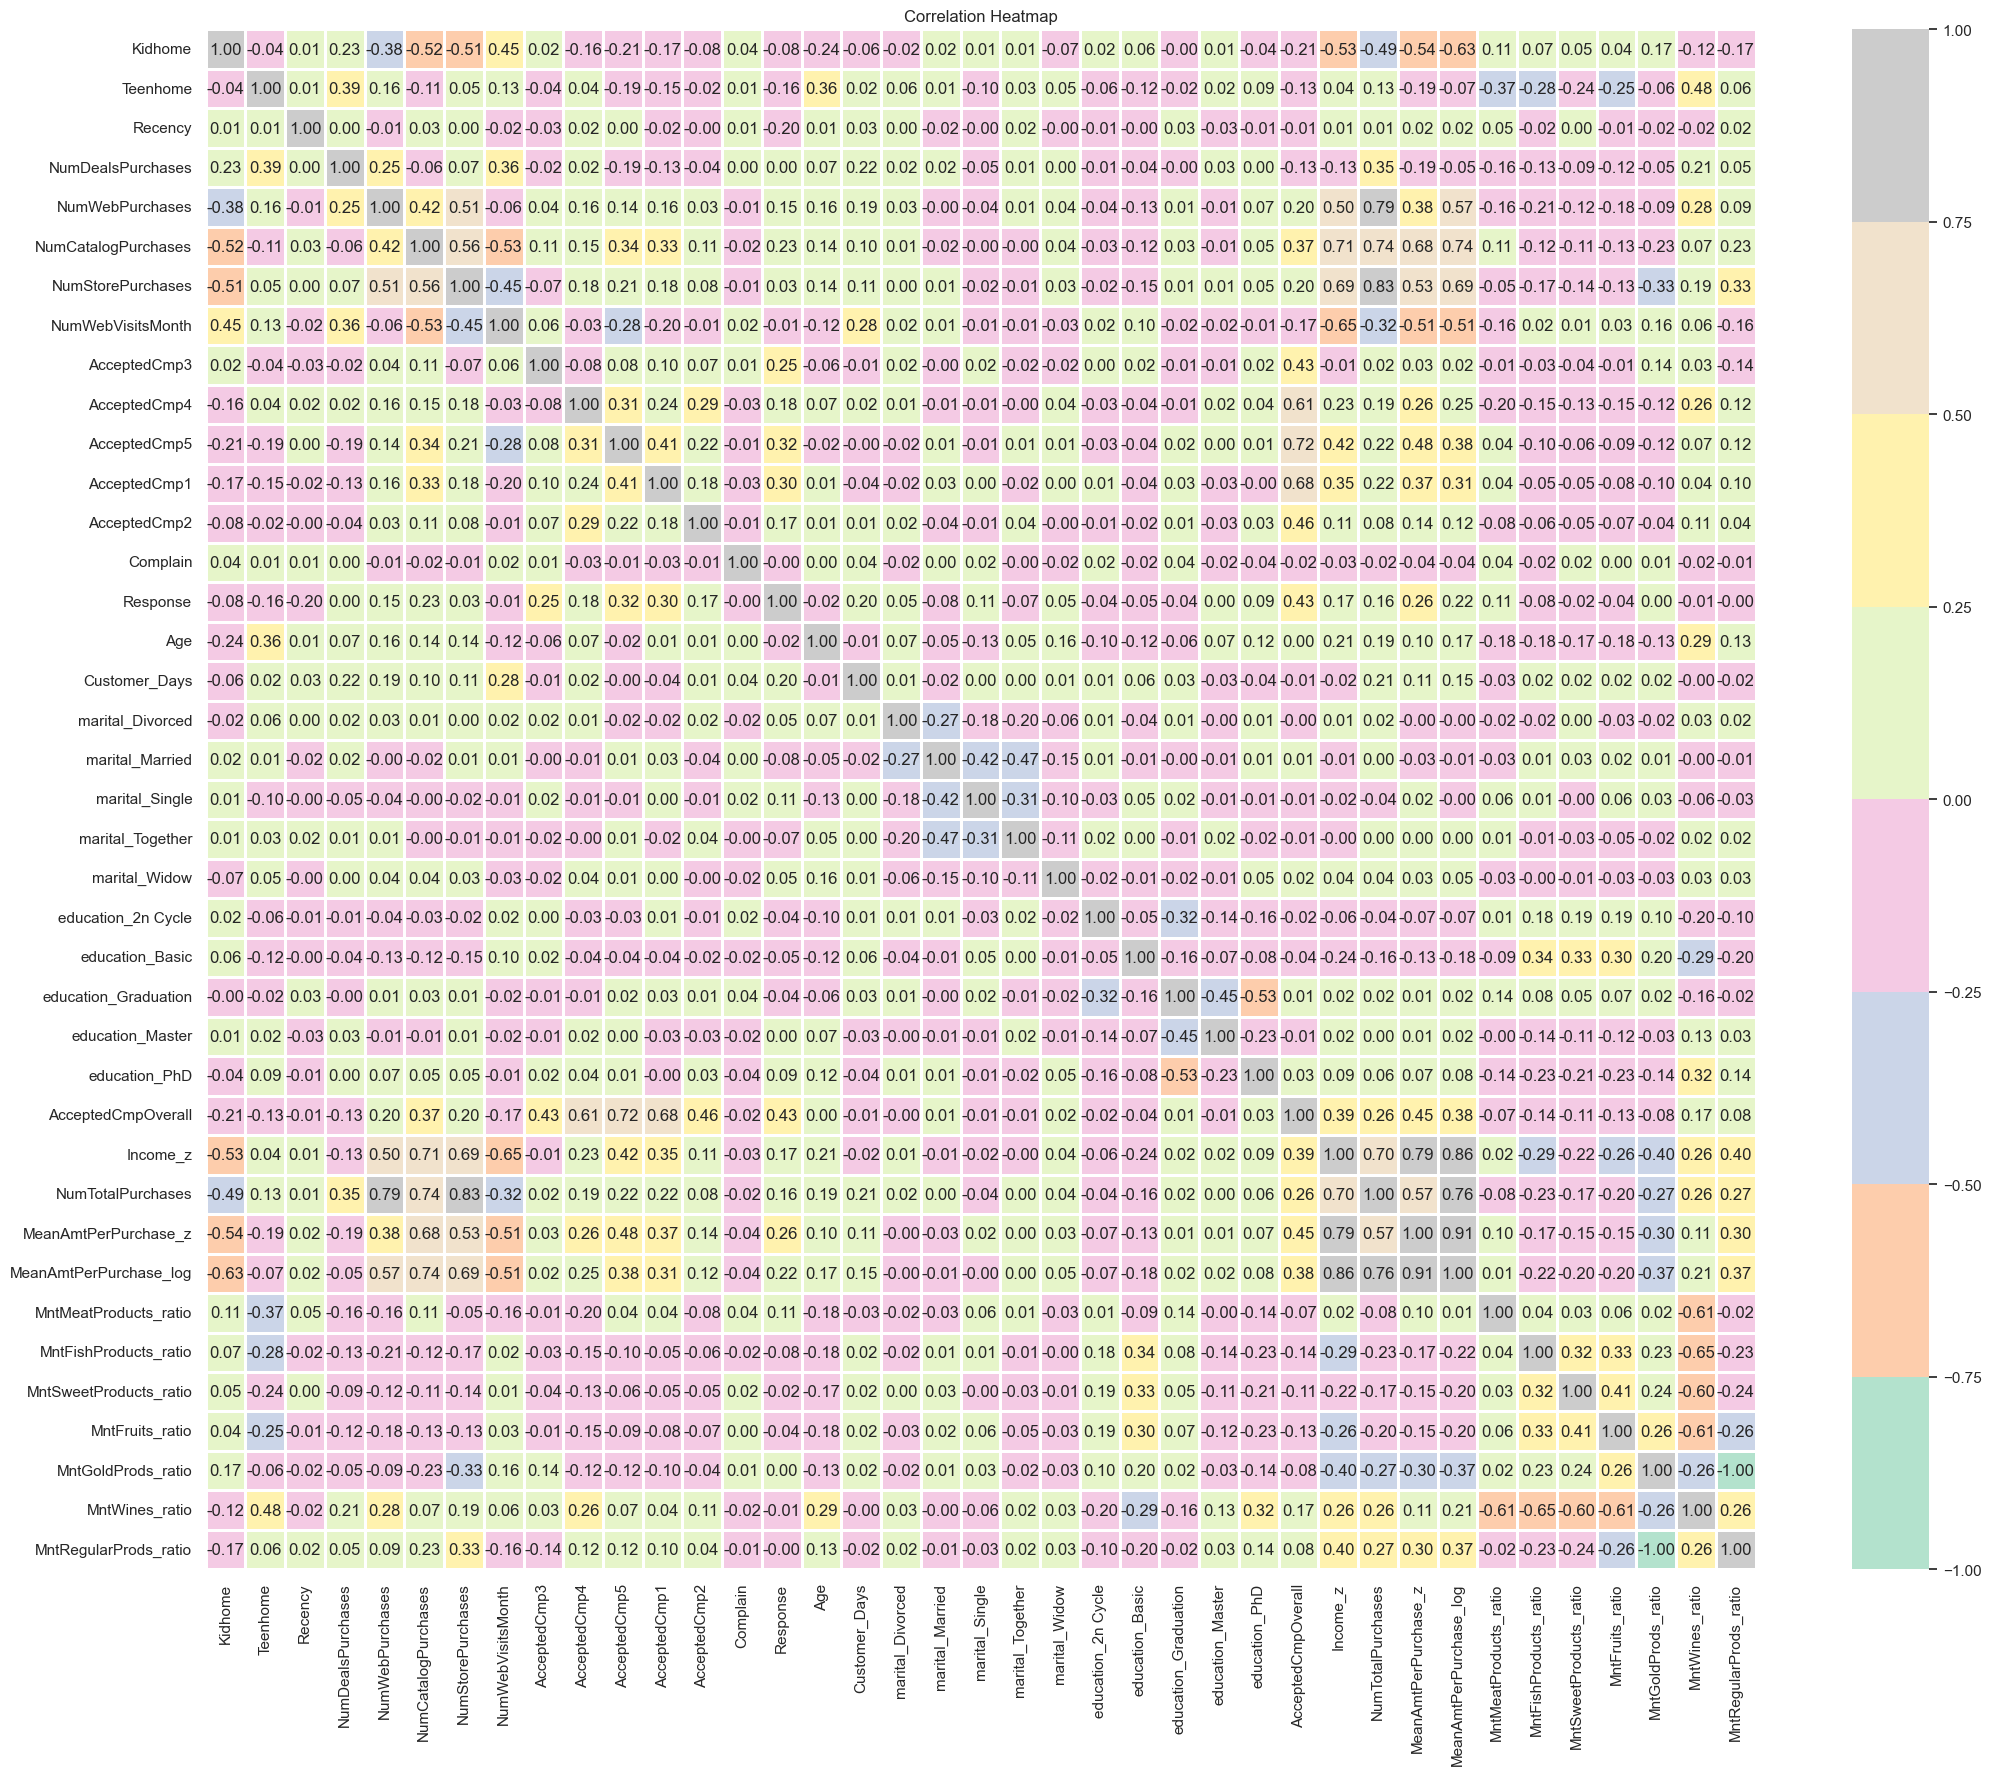

In [40]:
plt.figure(figsize=(25, 20))
sns.heatmap(dataset_selected_columns.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

In [41]:
dataset_selected_columns.to_csv('./dataset/ifood_selected_columns.csv', index=False)